In [27]:
import sys
import os
import pandas as pd
import statistics
from psycopg2.extras import RealDictCursor  
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath(os.path.join(os.path.dirname("./"), '..')))

from func.my_library_function import dest_db

cursor=dest_db(cursor_factory_param=RealDictCursor)


zagreb_app_query = 'Select * from zagreb_app'

cursor.execute(zagreb_app_query)
zagreb_app_query = cursor.fetchall()

zagreb_app = pd.DataFrame(data=zagreb_app_query)

zagreb_app




,njuskalo_id,author,Naslov,Cijena,Stambena povrsina,Netto povrsina,Lokacija,Broj soba,Kat,Godina izgradnje,Tip stana,Balkon/Loda/Terasa,Broj etaze,Broj parkirnih mjesta,Energetski razred,Oglas objavljen,Oglas prikazan
0,44685578,Roel nekretnine,"Luksuzan dvoetažni stan: Zagreb, Centar, 165 m...",577500.0,165.00,165.00,"Grad Zagreb, Donji Grad, Donji grad",4-sobni,2.,2023.0,U stambenoj zgradi,None,Dvoetažni,NaN,None,2025-05-19,1955
1,46798766,Public Real Estate,CENTAR 115m2 - Bauerova (Komforan 4soban stan)...,450000.0,115.00,NaN,"Grad Zagreb, Gornji Grad - Medveščak, Centar",4-sobni,1.,NaN,U stambenoj zgradi,None,Jednoetažni,NaN,None,2025-04-13,44
2,41702720,Real Estate Croatia d.o.o.,"Prodaja, Trešnjevka, stan 88m2 na uglu Nove ce...",255200.0,88.00,88.00,"Grad Zagreb, Trešnjevka - Sjever, Trešnjevka",3-sobni,3.,NaN,U stambenoj zgradi,None,Jednoetažni,NaN,None,2025-05-15,5406
3,46326064,Dogma nekretnine,"Maksimir, 3S-penthouse, VPM, spremište, 82,01 ...",349000.0,82.01,NaN,"Grad Zagreb, Maksimir, Gornji Bukovac",3-sobni,2.,2025.0,U stambenoj zgradi,Terasa,Jednoetažni,2.0,A+,2025-04-16,432
4,45583745,SKY NEKRETNINE,"DUBRAVA, Novoselečki put, trosoban stan, parki...",299890.0,98.40,98.40,"Grad Zagreb, Gornja Dubrava, Gornja Dubrava",3-sobni,Visoko prizemlje,2024.0,U stambenoj zgradi,None,Jednoetažni,NaN,None,2025-05-19,2818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9869,47107520,BARAK GRADNJA,Novogradnja-Stan Sesvete (Markovo polje) 1-sob...,197899.0,142.15,65.93,"Grad Zagreb, Sesvete, Markovo polje",2-sobni,Prizemlje,2025.0,U stambenoj zgradi,Terasa,Višeetažni,1.0,None,2025-05-22,31
9870,47107592,IMB Nekretnine,Ekskluzivna stambena oaza u srcu zelenog Maksi...,329990.0,114.78,103.91,"Grad Zagreb, Maksimir, Gornji Bukovac",3-sobni,1.,2008.0,U stambenoj zgradi,"Balkon, Terasa",Dvoetažni,1.0,A,2025-05-22,34
9871,47107628,BARAK GRADNJA,Novogradnja-Stan-Sesvete(Markovo Polje) *prila...,128499.0,43.99,42.55,"Grad Zagreb, Sesvete, Markovo polje",1-sobni,Prizemlje,2025.0,U stambenoj zgradi,Lođa (Loggia),Višeetažni,1.0,A+,2025-05-22,22
9872,47108095,Verus Villam d.o.o.,"STAN, 68.64 M2, CELJSKA 17, ZAGREB - PRODAJEM ...",147000.0,68.64,63.33,"Grad Zagreb, Črnomerec, Kustošija",3-sobni,Visoko prizemlje,1989.0,U stambenoj zgradi,Terasa,Jednoetažni,NaN,None,2025-05-22,39


In [28]:
#avg price with statistic library

avg_price = round(statistics.mean(zagreb_app['Cijena']), 2)

avg_price


311014.7

In [29]:
#avg price manual

price = zagreb_app['Cijena']

suma = sum(price)
duz = len(price)

avg_price_manual = suma / duz

round(avg_price_manual,2)


311014.7

In [30]:
#median price with statistic library
median_price = round(statistics.median(zagreb_app['Cijena']), 2)

median_price

259000.0

In [31]:
#median price manual

price_med = zagreb_app['Cijena'].dropna().sort_values().tolist()
n = len(price_med)

if n % 2 == 0:
    x1 = n // 2 - 1
    x2 = n // 2
    med = (price_med[x1] + price_med[x2]) / 2
else:
    x = n // 2
    med = price_med[x]
print(round(med, 2))



259000.0


In [32]:
#standard deviation manual

price_st = zagreb_app['Cijena'].dropna().sort_values().tolist()

n1 = len(price_st)

na_kvadrat = [(x - avg_price) ** 2 for x in price_st]
s = (sum(na_kvadrat) / (n - 1)) ** 0.5

round(s,2)

223091.76

In [33]:
#standard deviation with statistics library

price_st_py = round(statistics.stdev(zagreb_app['Cijena']),2) 
price_st_py

223091.76

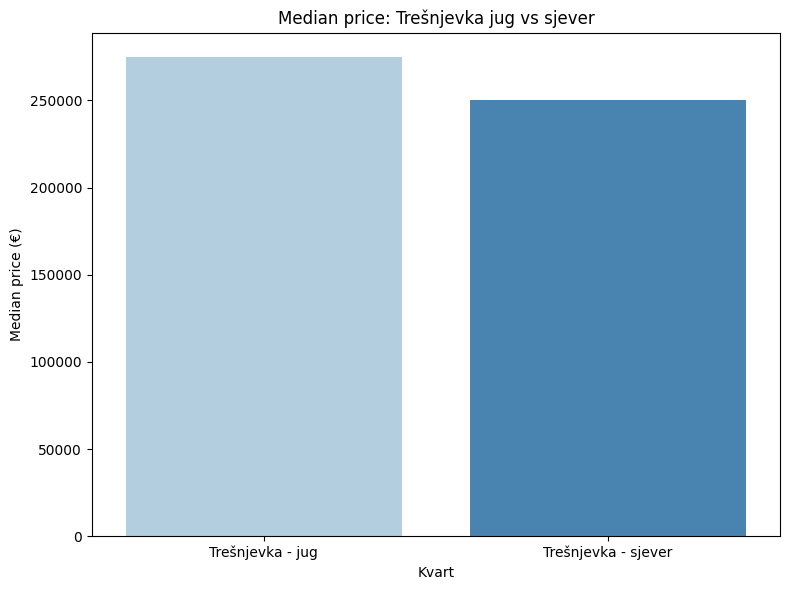

In [34]:
#Avg price by the 2 neighborhood


tresnjevka_jug = zagreb_app[zagreb_app['Lokacija'].str.contains('Trešnjevka - jug', case=False, na=False)]
tresnjevka_sjever = zagreb_app[zagreb_app['Lokacija'].str.contains('Trešnjevka - sjever', case=False, na=False)]


tresnjevka = pd.concat([tresnjevka_jug, tresnjevka_sjever])


tresnjevka['Kvart'] = tresnjevka['Lokacija'].apply(
    lambda x: 'Trešnjevka - jug' if 'jug' in x.lower() else 'Trešnjevka - sjever'
)

kvart_avg = tresnjevka.groupby('Kvart')['Cijena'].median().reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(x='Kvart', y='Cijena', data=kvart_avg, palette='Blues', hue='Kvart', legend=False)

plt.ylabel('Median price (€)')
plt.title('Median price: Trešnjevka jug vs sjever')
plt.tight_layout()
plt.show()



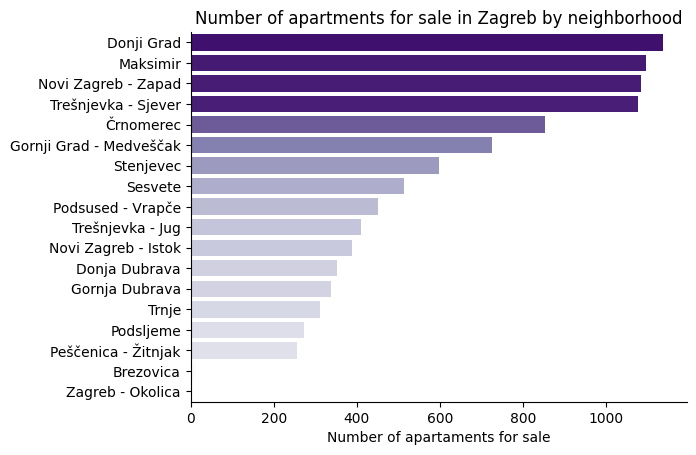

In [35]:
#Number of apartments for sale in Zagreb by neighborhood

zagreb_app['Kvart'] = zagreb_app['Lokacija'].str.extract(r'Grad Zagreb,\s*([^,]+)')

broj_po_kvartu = zagreb_app.groupby(zagreb_app['Kvart']).size().reset_index(name='Broj_Stanova')
broj_po_kvartu = broj_po_kvartu.sort_values('Broj_Stanova', ascending=False)


broj_po_kvartu

sns.barplot(data = broj_po_kvartu, x='Broj_Stanova', y='Kvart', hue='Broj_Stanova', palette='Purples', legend=False)
sns.despine()
plt.title('Number of apartments for sale in Zagreb by neighborhood')
plt.xlabel('Number of apartaments for sale')
plt.ylabel('')
plt.show()

In [36]:
#setting query for agencies that are selling apartaments in Zagreb

query_for_agencies="""SELECT *
FROM zagreb_app z
WHERE NOT EXISTS
(SELECT *
FROM
(SELECT * 
FROM zagreb_app
where author not ilike '%nekretnine%' 
and author not ilike '%nekretnina%'
and author not ilike '%d.o.o%' 
and author not ilike '%real%' 
and author not ilike '%Immobilien%' 
and author not ilike '%properties%'
and author not ilike '%agencija%'
and author not ilike '%projekt%'
and author not ilike '%www%'
and LEFT(author, 1) != UPPER(LEFT(author, 1))) as consumeri
where consumeri.author = z.author) 
and author !~ '\d+$' 
and author !~ '^[^A-Za-z0-9]'
ORDER BY author"""

cursor.execute(query_for_agencies)
result_agency_set=cursor.fetchall()

df_agency=pd.DataFrame(data=result_agency_set)

df_agency_count = int(df_agency['njuskalo_id'].count())

df_agency_count

9299

In [37]:
#setting query for private users that are selling apartaments in Zagreb

query_for_private_per= ''' SELECT * 
FROM zagreb_app
WHERE author not ilike '%nekretnine%' 
and author not ilike '%nekretnina%'
and author not ilike '%d.o.o%' 
and author not ilike '%real%' 
and author not ilike '%Immobilien%' 
and author not ilike '%properties%'
and author not ilike '%agencija%'
and author not ilike '%projekt%'
and author not ilike '%www%'
and LEFT(author, 1) != UPPER(LEFT(author, 1))'''

cursor.execute(query_for_private_per)
result_private_per_set=cursor.fetchall()

df_private=pd.DataFrame(data=result_private_per_set)

df_private_count = int(df_private['njuskalo_id'].count())

df_private_count

389

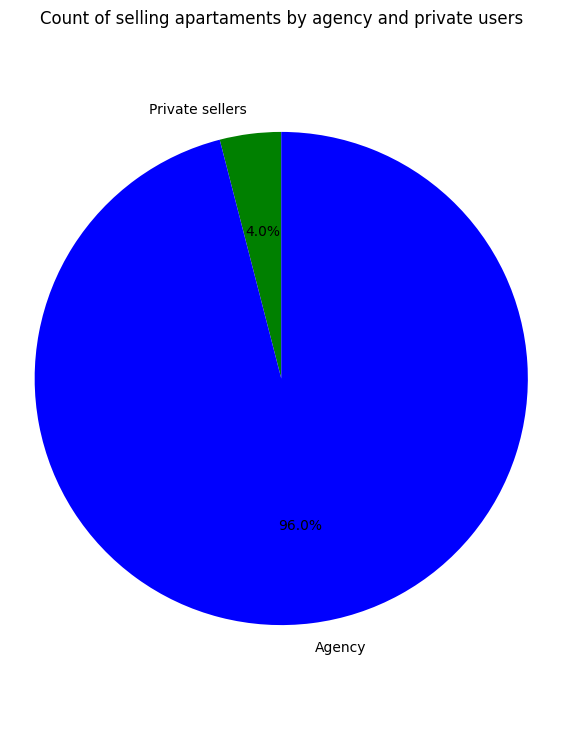

In [38]:
#piechart to show the percentage of sales by agencies and private users

total = df_private_count + df_agency_count
private_pct = df_private_count / total * 100
agency_pct = df_agency_count / total * 100

labels = ['Private sellers', 'Agency']
sizes = [private_pct, agency_pct]
colors = ['green', 'blue'] 


plt.figure(figsize=(7,9))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Count of selling apartaments by agency and private users')
plt.axis('equal')  
plt.show()


In [39]:
#median price by neighborhood - agency

df_agency['Kvart'] = df_agency['Lokacija'].str.extract(r'Grad Zagreb,\s*([^,]+)')

agency_prices = df_agency.groupby('Kvart')['Cijena'].median()

In [40]:
#median price by neighborhood - private users

df_private['Kvart'] = df_private['Lokacija'].str.extract(r'Grad Zagreb,\s*([^,]+)')

private_prices = df_private.groupby('Kvart')['Cijena'].median()

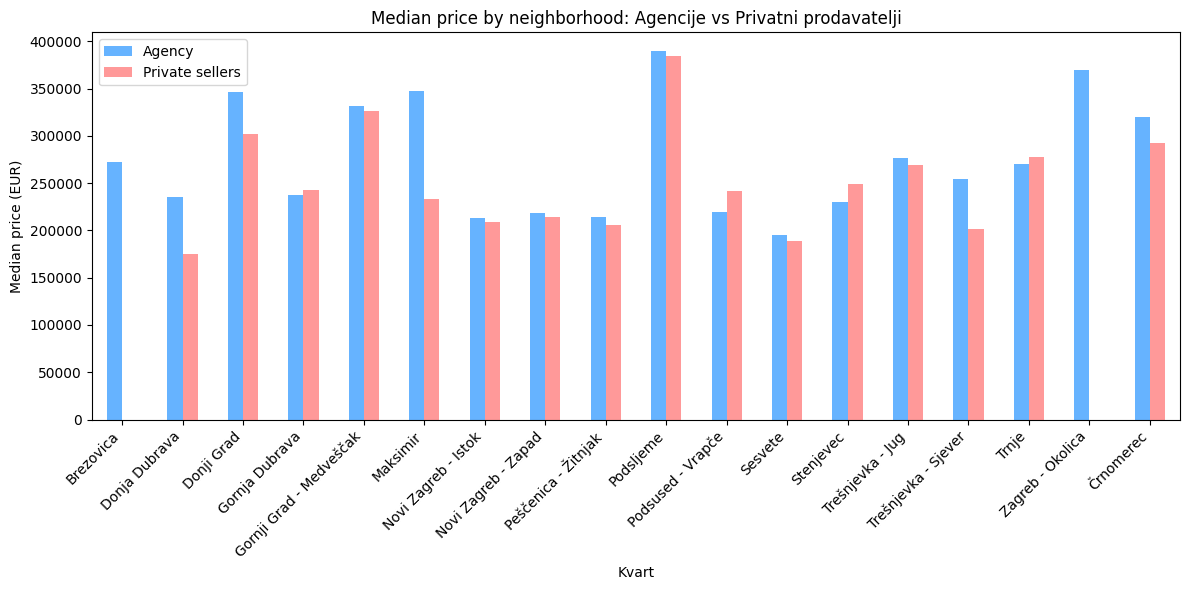

In [41]:

combined = pd.DataFrame({
    'Agency': agency_prices,
    'Private sellers': private_prices
})


combined.plot(kind='bar', figsize=(12, 6), color=['#66b3ff', '#ff9999'])
plt.ylabel('Median price (EUR)')
plt.title('Median price by neighborhood: Agencije vs Privatni prodavatelji')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()

In [42]:
zagreb_app['Oglas objavljen'] = pd.to_datetime(zagreb_app['Oglas objavljen'])

zagreb_app = zagreb_app.sort_values('Oglas objavljen')

zagreb_app['x']=(zagreb_app['Oglas objavljen']-zagreb_app['Oglas objavljen'].min()).dt.days
zagreb_app['y'] = zagreb_app['Cijena']

n = len(zagreb_app)
sum_x = zagreb_app['x'].sum()
sum_y = zagreb_app['y'].sum()
sum_x2 = (zagreb_app['x'] ** 2).sum()
sum_xy = (zagreb_app['x'] * zagreb_app['y']).sum()

a = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
b = (sum_y - a * sum_x) / n

print(f'Jednadzba je: y = {a:.2f} * x + {b:.2f}')

Jednadzba je: y = 918.51 * x + 280551.12


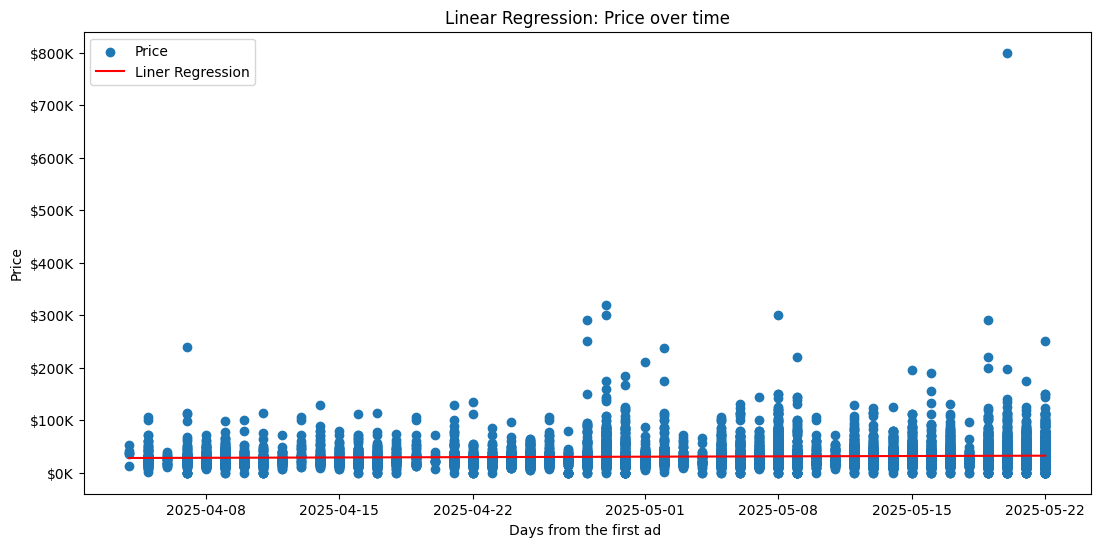

In [43]:
import matplotlib.dates as mdates
zagreb_app['y_pred'] = a * zagreb_app['x'] + b

plt.figure(figsize=(13,6))
plt.scatter(zagreb_app['Oglas objavljen'], zagreb_app['y'], label='Price')
plt.plot(zagreb_app['Oglas objavljen'], zagreb_app['y_pred'], color='red', label='Liner Regression')
ay = plt.gca()
ay.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/10000)}K'))

plt.xlabel('Days from the first ad ')
plt.ylabel('Price')
plt.title('Linear Regression: Price over time')
plt.legend()
plt.show()

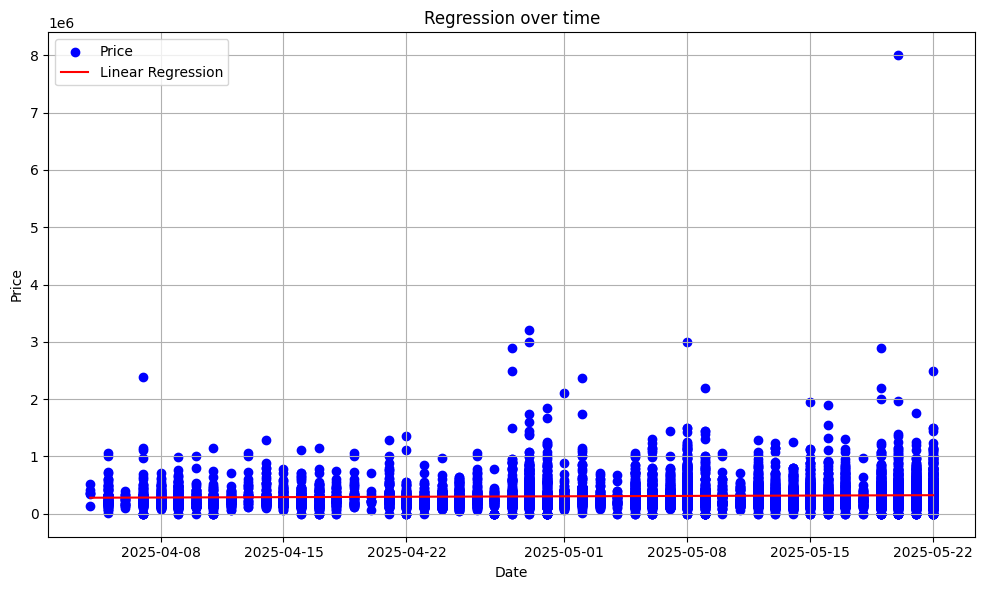

In [44]:
from sklearn.linear_model import LinearRegression

zagreb_app['Oglas objavljen'] = pd.to_datetime(zagreb_app['Oglas objavljen'])

zagreb_app = zagreb_app.sort_values('Oglas objavljen')

zagreb_app['dani_od_pocetka']=(zagreb_app['Oglas objavljen']-zagreb_app['Oglas objavljen'].min()).dt.days

X = zagreb_app[['dani_od_pocetka']]
y = zagreb_app['Cijena']


model = LinearRegression()
model.fit(X, y)


zagreb_app['predicted_cijena'] = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(zagreb_app['Oglas objavljen'], zagreb_app['Cijena'], color='blue', label='Price')
plt.plot(zagreb_app['Oglas objavljen'], zagreb_app['predicted_cijena'], color='red', label='Linear Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Regression over time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

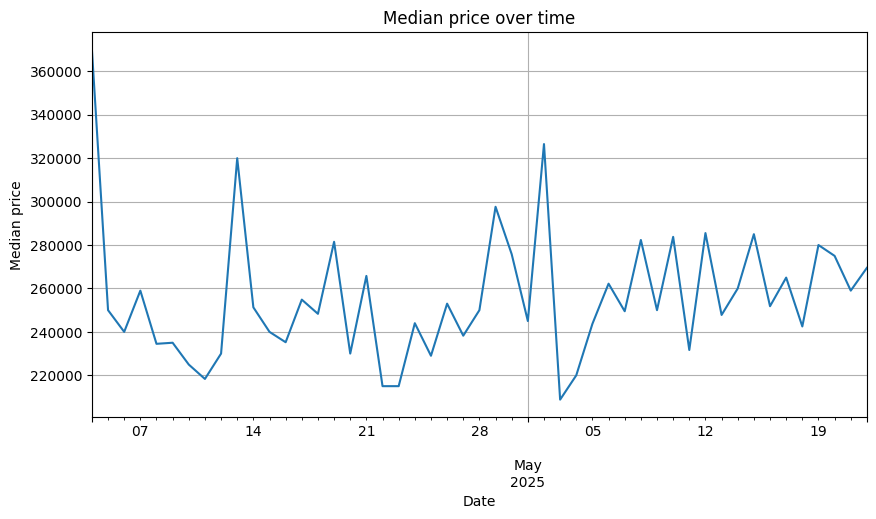

In [47]:
#plot by pandas - line

zagreb_app.groupby('Oglas objavljen')['Cijena'].median().plot(kind='line', figsize=(10,5))
plt.title("Median price over time")
plt.xlabel("Date")
plt.ylabel("Median price")
plt.grid(True)
plt.show()

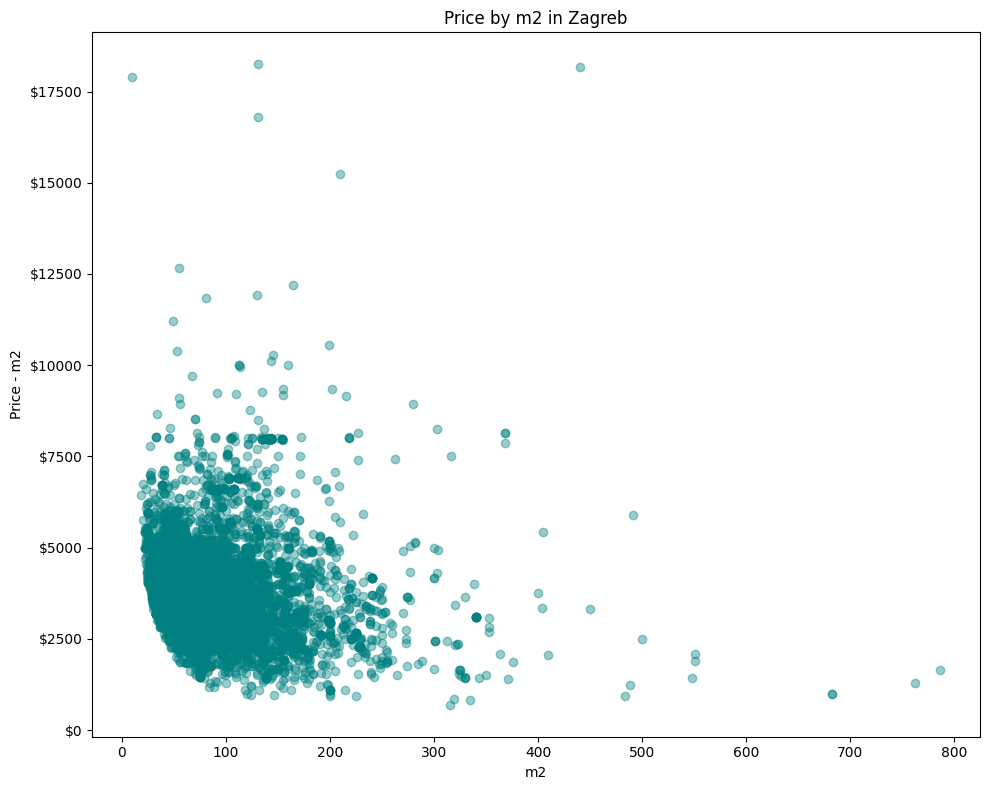

In [49]:
zagreb_app['Stambena povrsina']= zagreb_app['Stambena povrsina'].dropna()

filter = zagreb_app[zagreb_app['Cijena']> 100000]

zagreb_app['cijena_po_m2'] = filter['Cijena'] / zagreb_app['Stambena povrsina']



plt.figure(figsize=(10,8))
plt.scatter(zagreb_app['Stambena povrsina'], zagreb_app['cijena_po_m2'], alpha=0.4, color='teal')
plt.xlabel('m2')
plt.ylabel('Price - m2')
ay = plt.gca()
ay.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1)}'))
plt.title('Price by m2 in Zagreb')
plt.tight_layout()
plt.show()

